<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Model_WithoutKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pickle
from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from tensorflow.python import pywrap_tensorflow
from tensorflow.python.tools import inspect_checkpoint as ckpt 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
#FEATURES AND LABELS  
 
with open('/content/featuresFinal_withNOV.bin','rb') as file:
  f = pickle.load(file)
  
with open('/content/labelsFinal_withNOV.bin','rb') as file:
  l = pickle.load(file)

In [3]:
print(np.shape(f))
print(type(f))

(2753, 10)
<class 'numpy.ndarray'>


In [0]:
features = []
labels = []

for i in f:
  features.append(list(map(float,i)))
for i in l:
  labels.append(list(map(float,i)))

In [0]:
x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()

In [8]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1092942400553846727
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6843375826238602749
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7445124318483124853
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7256726459773730933
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [9]:
x = tf.placeholder(shape = (None,10), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'target')

#Layer 1 
w1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((10, 15))), name = 'w1')
b1 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,15))), name = 'b1')

#Layer2 

w2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((15,25))), name = 'w2')
b2 = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,25))), name = 'b2')

#out

wo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((25,1))), name = 'wo')
bo = tf.Variable((tf.glorot_uniform_initializer(dtype = tf.float32)((1,1))), name = 'bo')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
hidl1 = tf.add(tf.matmul(x,w1),b1, name ='hidden1')
hidl1 = tf.nn.relu(hidl1)
hidl2 = tf.add(tf.matmul(hidl1,w2),b2, name = 'hidden2')
hidl2 = tf.nn.relu(hidl2)
out = tf.add(tf.matmul(hidl2,wo),bo,name = 'output')


In [0]:
## MSE - Loss function
loss = tf.reduce_mean(tf.square(tf.subtract(y,out))) 

## Optimizer - Adam
opt = tf.train.AdamOptimizer(name = 'optimizer', learning_rate=0.005)
op_train = opt.minimize(loss, name ='train_op')


In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

29644.365	16293.603
31500.777	13622.53
73588.32	12934.1045
62514.812	25130.246
43590.457	36740.625
24692.992	44886.316
40983.902	3994.1099
47038.8	9280.725
24110.117	31435.898
14212.746	34417.977
19172.146	27952.566
59701.125	52578.473
45792.34	23167.727
4220.876	8229.288
54122.14	77213.516
30068.613	28246.617
10363.035	40580.305
12695.073	41669.914
29915.695	51025.06
26817.992	36722.434
38665.93	45956.277
24312.047	31652.598
46157.08	53113.977
39536.39	25501.486
47544.58	2161.368
3022.3901	25973.2
28560.951	31434.166
81986.59	39298.055
13085.785	54138.92
44983.188	29180.008
48709.945	43906.07
2499.4216	56676.4
42743.945	29442.559
42042.047	29331.523
73734.8	12473.68
33405.547	18356.396
21841.574	25831.83
28262.926	11253.445
44558.984	29835.082
25043.25	53992.47
60842.957	92463.305
45687.598	23493.33
35921.145	55501.418
45491.83	30079.605
34611.297	34420.016
43134.547	25729.525
33412.35	30462.332
22381.076	9595.119
16339.71	18233.748
43329.336	13543.21
7512.234	15059.8545
45979.926	462

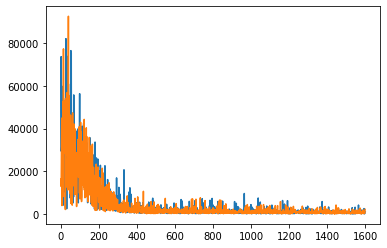

In [14]:

train=[]
val=[]

with tf.device('/device:CPU:0'):
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    #saved.restore(sess, "/content/final_check_weights.ckpt")
    mini =[]
    for i in range(1600):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
      
      #TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
      z= sess.run([loss,op_train, update_ops], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      
      ##VALIDATION LOSS
      
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    plt.plot(train)
    plt.plot(val)
    save_path = save.save(sess, "/content/final_TBP_WITHNOV.ckpt")
    print('Saved model!')
    
 

In [16]:
val = []

with tf.Session() as sess:
    
    saver = tf.train.Saver()
    saver.restore(sess, '/content/final_TBP_WITHNOV.ckpt')
    val.append(sess.run('output',feed_dict={x : x_batch}))
    


INFO:tensorflow:Restoring parameters from /content/final_TBP_WITHNOV.ckpt


In [17]:
print(type(tf.get_default_graph().as_graph_def()))
tf.io.write_graph(tf.get_default_graph().as_graph_def(), '/content/', 'Final_GraphwithNovember.pbtxt')

<class 'tensorflow.core.framework.graph_pb2.GraphDef'>


'/content/Final_GraphwithNovember.pbtxt'

In [0]:
with open('/content/Final_Graph_WITHNOV.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())
  

Restoration Files (No need to run these unless required for additional analysis)

In [0]:
with open('/content/x_test.bin','wb') as file:
  pickle.dump(x_test_t, file)
with open('/content/y_test.bin','wb') as file:
  pickle.dump(y_test_t, file)